In [1]:
!pip install tensorflow==2.9.1
import tensorflow as tf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 87.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 80.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 30.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.0.5
    Uninstalling keras-3.0.5:
      Successfully uninstalled keras-3.0.5
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Attempting uninstall: tensorflow-estimator
 

In [2]:
print(tf.__version__)

2.9.1


In [3]:
!pip install opendatasets

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [4]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dir = '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
test_dir = '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

train_data = image_dataset_from_directory(train_dir,
                                             image_size=(224,224),
                                             label_mode='categorical',
                                             batch_size=32)

test_data = image_dataset_from_directory(test_dir,
                                         image_size=(224,224),
                                         label_mode='categorical',
                                         batch_size=32)

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


In [5]:
train_data, test_data

(<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>,
 <BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>)

In [6]:
class_names = train_data.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
def get_random_image(directory, class_names=class_names):
    rn = random.randint(0, len(class_names) - 1)
    choice = random.choice(os.listdir(os.path.join(directory, class_names[rn])))
    img_path = os.path.join(directory, class_names[rn], choice)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    fontsize=10
    plt.title(class_names[rn], fontdict={'fontsize': fontsize})
    plt.axis(False)

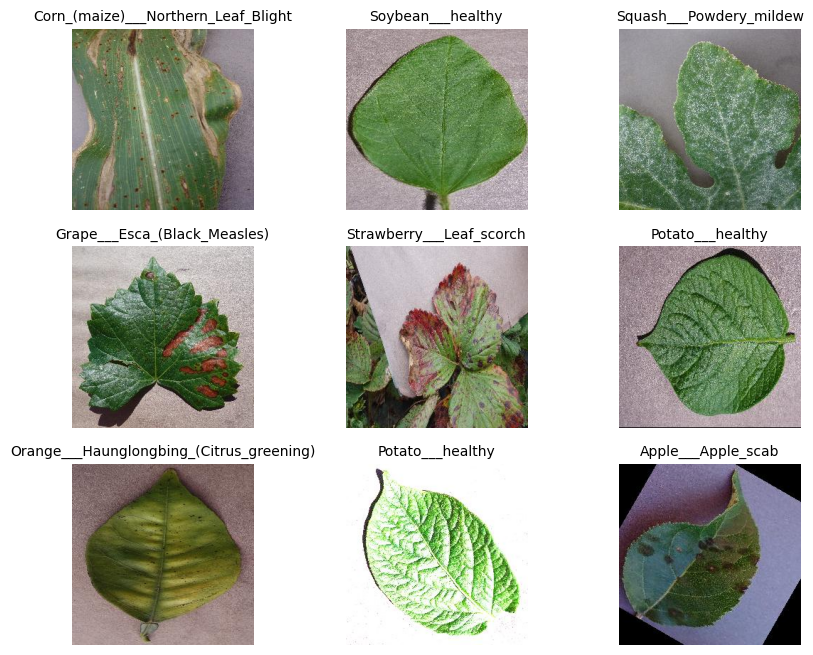

In [8]:
plt.figure(figsize=(10,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  get_random_image(train_dir)

In [9]:
import tensorflow as tf
from tensorflow.keras import layers

image_shape = (224, 224, 3)

base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=image_shape, name='input_layer')

x = base_model(inputs)

x = layers.GlobalAveragePooling2D(name='GlobalAveragePooling2D_layer')(x)

outputs = layers.Dense(38, activation='softmax', name='output_layer')(x)

feature_model = tf.keras.Model(inputs, outputs, name='plant_disease_model')

16705208/16705208 [==============================] - 0s 0us/step


In [10]:
base_model.trainable = True

for layer in base_model.layers[:-20]:
    layer.trainable = False
    
feature_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [11]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

In [12]:
feature_model.summary()

Model: "plant_disease_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 GlobalAveragePooling2D_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 38)                48678     
                                                                 
Total params: 4,098,249
Trainable params: 1,399,638
Non-trainable params: 2,698,611
_________________________________________________________________


In [13]:
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [14]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", 
                                                  patience=3)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(moniter='val_loss', factor=0.2, patience=2, verbose=1, min_lr=1e-7)
checkpoint_path = 'fine_tune_checkpoints/'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weigths_only=True, save_best_only=True, moniter='val_loss')

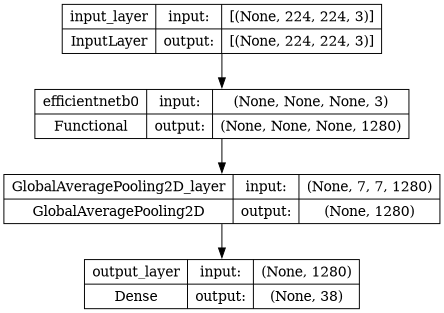

In [15]:
from tensorflow.keras.utils import plot_model
plot_model(feature_model, 
           show_shapes = True,
           show_dtype=False,
           show_layer_names = True, 
           rankdir = 'TB', 
           expand_nested = False, 
           dpi = 70)

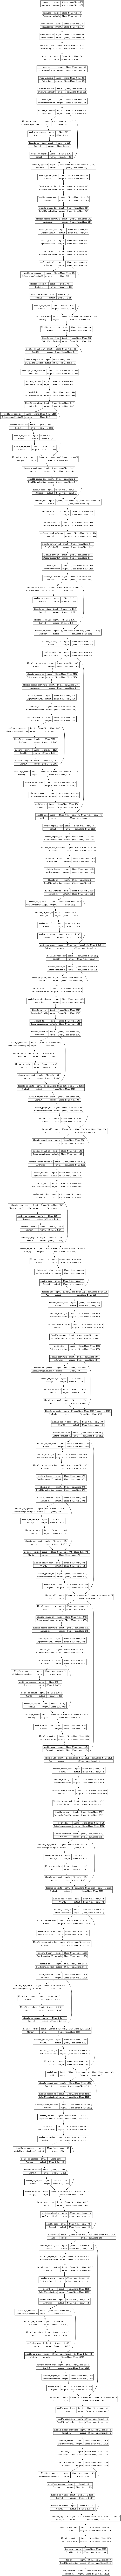

In [16]:
plot_model(base_model, 
           show_shapes = True,
           show_dtype=False,
           show_layer_names = True, 
           rankdir = 'TB', 
           expand_nested = False, 
           dpi = 70)

In [17]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint directory to store the checkpoints
initial_epochs=5
checkpoint_dir = './kaggle/working/'
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback=ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True,
    save_best_only=False,
    save_freq=10*len(train_data),  # Save every 10 epochs
)

history1 = feature_model.fit(train_data,epochs=initial_epochs,
                  steps_per_epoch=len(train_data),
                  validation_data=test_data,
                  validation_steps=len(test_data),
                  callbacks=[early_stopping,
                             model_checkpoint,
                             reduce_lr,
                             create_tensorboard_callback('plant_disease_model',
                                                         'EfficientNetB010'),
                             checkpoint_callback])  # Add checkpoint callback


Saving TensorBoard log files to: plant_disease_model/EfficientNetB010/20240407-043208
Epoch 1/5
2197/2197 [==============================] - 4058s 2s/step - loss: 0.1363 - accuracy: 0.9597 - val_loss: 0.0387 - val_accuracy: 0.9870 - lr: 0.0010
Epoch 2/5
2197/2197 [==============================] - 4060s 2s/step - loss: 0.0440 - accuracy: 0.9859 - val_loss: 0.0286 - val_accuracy: 0.9905 - lr: 0.0010
Epoch 3/5
2197/2197 [==============================] - 3764s 2s/step - loss: 0.0319 - accuracy: 0.9895 - val_loss: 0.0294 - val_accuracy: 0.9899 - lr: 0.0010
Epoch 4/5
2197/2197 [==============================] - 3808s 2s/step - loss: 0.0251 - accuracy: 0.9914 - val_loss: 0.0237 - val_accuracy: 0.9932 - lr: 0.0010
Epoch 5/5
2197/2197 [==============================] - 3749s 2s/step - loss: 0.0191 - accuracy: 0.9936 - val_loss: 0.0319 - val_accuracy: 0.9901 - lr: 0.0010


In [18]:
feature_model.load_weights(checkpoint_path)

In [19]:
feature_model.evaluate(test_data)

550/550 [==============================] - 686s 1s/step - loss: 0.0237 - accuracy: 0.9932


[0.023718630895018578, 0.9932278394699097]

In [20]:
import matplotlib.pyplot as plt

def plot_history(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = history1.epoch

  acc = history.history['accuracy']
  val_acc =history.history['val_accuracy']

  plt.figure(figsize=(8,10))
  plt.subplot(2,1,1)
  plt.plot(epochs,loss)
  plt.plot(epochs,val_loss)
  plt.title('Training_loss vs Validation_loss')

  plt.subplot(2,1,2)
  plt.plot(epochs,acc)
  plt.plot(epochs,val_acc)
  plt.title('Training_accuracy vs Validation_accuracy')

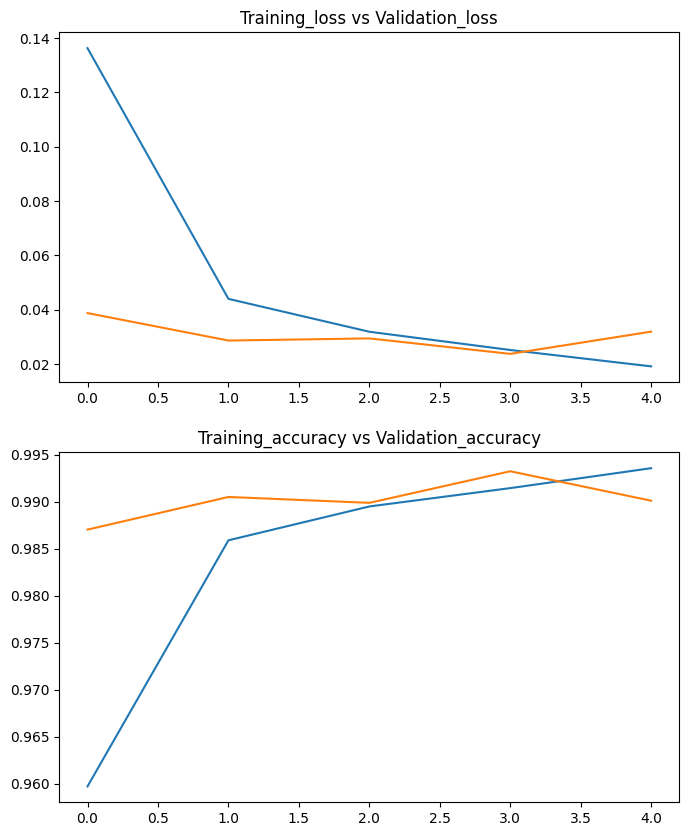

In [21]:
plot_history(history1)

In [22]:
feature_model.save('best_plant_model.h5')